# Semantic Segmentation
## SegNet with ResNet50 Backbone

In [1]:
!pip install segmentation-models

In [2]:
!pip install q tensorflow==2.2

In [3]:
!pip install q keras==2.3.0

In [4]:
!pip install keras-segmentation

### Mount Drive

In [5]:
from google.colab import drive
drive.mount('/content/drive/') 

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


### Importing packages

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
import cv2
import tensorflow as tf
from keras_segmentation.models.segnet import resnet50_segnet




Using TensorFlow backend.


### Data Path

In [7]:
files_path = "/content/drive/MyDrive/A3_Dataset.zip (Unzipped Files)/A3_Dataset/dataset1"

In [8]:
train_label_dir=os.path.join(files_path+'/annotations_prepped_train')
train_image_dir=os.path.join(files_path+'/images_prepped_train')
test_label_dir=os.path.join(files_path+'/annotations_prepped_test')
test_image_dir=os.path.join(files_path+'/images_prepped_test')

### Count of Data

In [9]:
#Total Number
print('Total Training Images: ',len(os.listdir(train_image_dir)))
print('Total Training Grouth Truth: ',len(os.listdir(train_label_dir)))
print('Total Test Images: ',len(os.listdir(test_image_dir)))
print('Total Grouth Truth: ',len(os.listdir(test_label_dir)))

Total Training Images:  367
Total Training Grouth Truth:  367
Total Test Images:  101
Total Grouth Truth:  101


### Getting path of Images

In [10]:
train_image = [os.path.join(train_image_dir,fname) for fname in os.listdir(train_image_dir)[:]]
train_label = [os.path.join(train_label_dir,fname) for fname in os.listdir(train_label_dir)[:]]

test_image = [os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]]
test_label = [os.path.join(test_label_dir,fname) for fname in os.listdir(test_label_dir)[:]]

### Loading data

In [11]:
image_size = (224,224)

#function to load data
def open_image(img):
    return np.array(Image.open(img).resize(image_size, Image.NEAREST))

train_images = np.stack([open_image(i) for i in train_image])
train_labels = np.stack([open_image(i) for i in train_label])
test_images = np.stack([open_image(i) for i in test_image])
test_labels = np.stack([open_image(i) for i in test_label])

print('Train Images Shape: ',train_images.shape)
print('Train labels Shape: ',train_labels.shape)
print('Test Images Shape: ',test_images.shape)
print('Test labels Shape: ',test_labels.shape)

Train Images Shape:  (367, 224, 224, 3)
Train labels Shape:  (367, 224, 224)
Test Images Shape:  (101, 224, 224, 3)
Test labels Shape:  (101, 224, 224)


### Displaying Loaded data

<function matplotlib.pyplot.show>

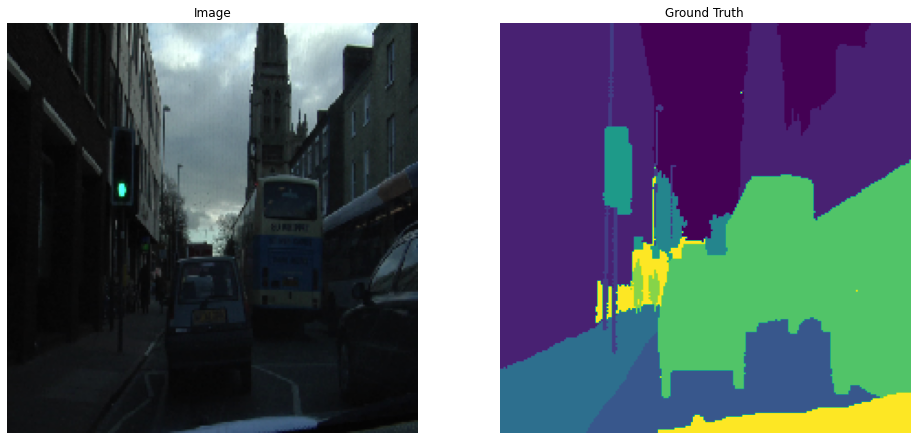

In [12]:
plt.figure(figsize = (25,25))
cells_color=[1, 1, 0]

image= train_images[0]
mask= train_labels[0]

#plotting image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Ground Truth')
plt.show

### Loading Model

In [13]:
model = resnet50_segnet(n_classes=12 , input_height=224, input_width=224)

94658560/94653016 [==============================] - 1s 0us/step


In [14]:
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 224, 224, 3)  0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1 (Conv2D)                  (None, 112, 112, 64) 9472        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
bn_conv1 (BatchNormalization)   (None, 112, 112, 64) 256         conv1[0][0]                      
____________________________________________________________________________________________

### Model Training on Augmented Data

In [15]:
model.train(
    train_images =  train_image_dir,
    train_annotations = train_label_dir,
    input_height=224,
    input_width=224,
    n_classes=12,
    do_augment=True,
    val_images=test_image_dir,
    val_annotations=test_label_dir,
    augmentation_name="aug_all",
    epochs=50,
    validate=True,
    batch_size=2,
    val_batch_size=2,
    steps_per_epoch=100,
    val_steps_per_epoch=50,
)

Verifying training dataset


100%|██████████| 367/367 [00:07<00:00, 51.48it/s]


Dataset verified! 
Verifying validation dataset


100%|██████████| 101/101 [00:02<00:00, 49.48it/s]


Dataset verified! 
Epoch 1/50


/usr/local/lib/python3.7/dist-packages/imgaug/augmenters/segmentation.py:191: FutureWarning: skimage.measure.label's indexing starts from 0. In future version it will start from 1. To disable this warning, explicitely set the `start_label` parameter to 1.
  segments = segmentation.slic(image, n_segments=n_segments_samples[i], compactness=10)


100/100 [==============================] - 107s 1s/step - loss: 1.3352 - accuracy: 0.6264 - val_loss: 3.7124 - val_accuracy: 0.5459
Epoch 2/50
100/100 [==============================] - 77s 765ms/step - loss: 1.0714 - accuracy: 0.6853 - val_loss: 1.0117 - val_accuracy: 0.7229
Epoch 3/50
100/100 [==============================] - 90s 895ms/step - loss: 0.9265 - accuracy: 0.7210 - val_loss: 3.5018 - val_accuracy: 0.5420
Epoch 4/50
100/100 [==============================] - 75s 751ms/step - loss: 0.8626 - accuracy: 0.7363 - val_loss: 1.0454 - val_accuracy: 0.7245
Epoch 5/50
100/100 [==============================] - 89s 886ms/step - loss: 0.8410 - accuracy: 0.7443 - val_loss: 0.7434 - val_accuracy: 0.8027
Epoch 6/50
100/100 [==============================] - 80s 802ms/step - loss: 0.7841 - accuracy: 0.7590 - val_loss: 0.6374 - val_accuracy: 0.8194
Epoch 7/50
100/100 [==============================] - 82s 818ms/step - loss: 0.7485 - accuracy: 0.7669 - val_loss: 0.7690 - val_accuracy: 0.785

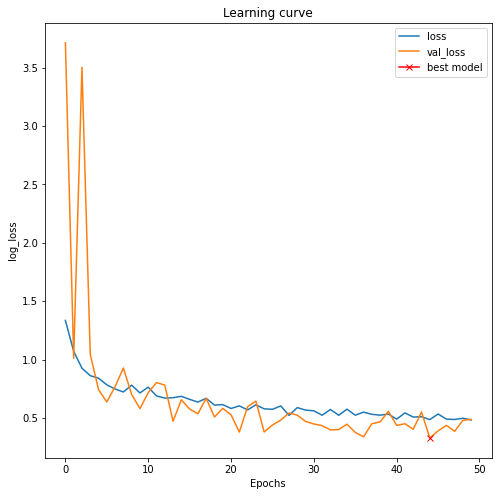

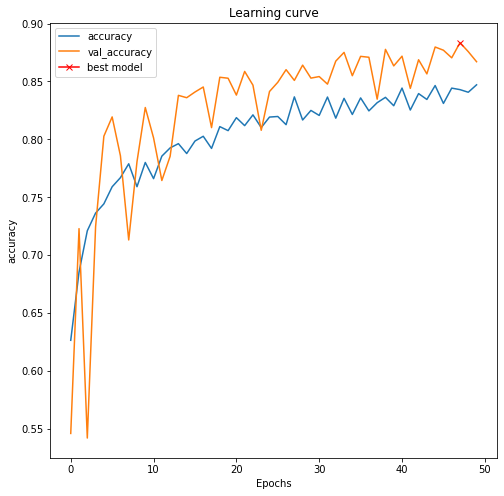

In [16]:
plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model.history.history["loss"], label="loss")
plt.plot(model.history.history["val_loss"], label="val_loss")
plt.plot( np.argmin(model.history.history["val_loss"]), np.min(model.history.history["val_loss"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("log_loss")
plt.legend();
plt.show()

plt.figure(figsize=(8, 8))
plt.title("Learning curve")
plt.plot(model.history.history["accuracy"], label="accuracy")
plt.plot(model.history.history["val_accuracy"], label="val_accuracy")
plt.plot( np.argmax(model.history.history["val_accuracy"]), np.max(model.history.history["val_accuracy"]), marker="x", color="r", label="best model")
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.legend();
plt.show()

### Quantitative Result

In [17]:
print(model.evaluate_segmentation( inp_images_dir=test_image_dir  , annotations_dir=test_label_dir ) )

101it [00:08, 11.68it/s]

{'frequency_weighted_IU': 0.785484997245698, 'mean_IU': 0.463838999139413, 'class_wise_IU': array([0.86354865, 0.79641647, 0.        , 0.92499106, 0.74747827,
       0.8380137 , 0.00780496, 0.33104393, 0.58856506, 0.022391  ,
       0.31768442, 0.12813046])}


In [18]:
sample_image=[os.path.join(test_image_dir,fname) for fname in os.listdir(test_image_dir)[:]][0]

In [19]:
o = model.predict_segmentation(
    inp=sample_image,
    out_fname="/tmp/out.png" , overlay_img=True, show_legends=True,
    class_names = [ "Sky",    "Building", "Pole","Road","Pavement","Tree","SignSymbol", "Fence", "Car","Pedestrian", "Bicyclist"]

)

### Qaulitative Result

<function matplotlib.pyplot.show>

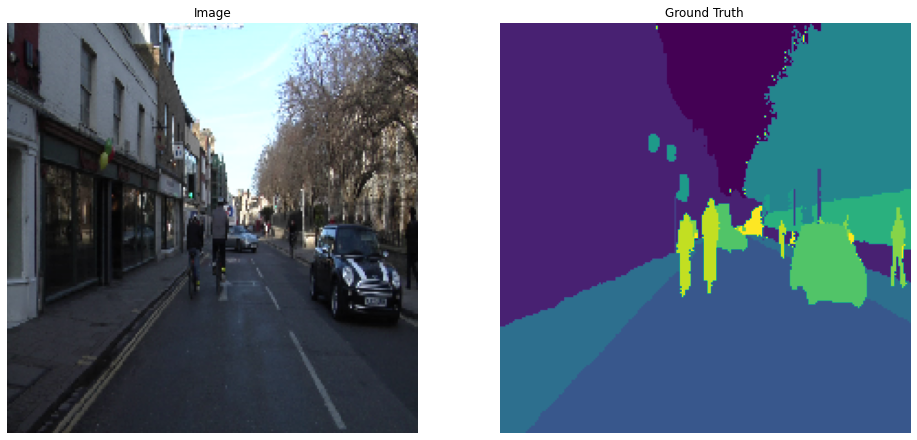

In [20]:
plt.figure(figsize = (25,25))
image= test_images[0]
mask= test_labels[0]

#plotting image
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.axis('off')
plt.title('Image')

#plotting ground label
plt.subplot(1, 3, 2)
plt.imshow(mask)
plt.axis('off')
plt.title('Ground Truth')
plt.show

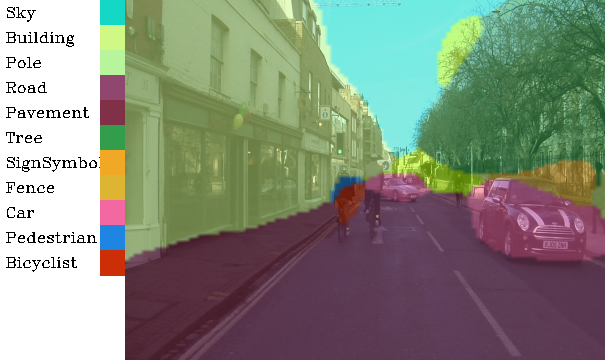

In [21]:
from IPython.display import Image
Image('/tmp/out.png')